In [1]:
import sys
sys.path.append('')
import matplotlib.pylab as pl
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import scipy.linalg 
import ot
import time

In [2]:
from otdd_main.otdd.pytorch.datasets import load_torchvision_data
from otdd_main.otdd.pytorch.distance import DatasetDistance

ot.gpu not found - coupling computation will be in cpu


# One Example

In [3]:
loaders_src = load_torchvision_data('FashionMNIST', valid_size=0, resize = 28, maxsize=2000)[0]
loaders_tgt = load_torchvision_data('KMNIST',  valid_size=0, resize = 28, maxsize=2000)[0]

test
Fold Sizes: 2000/10000 (train/test)
test
Fold Sizes: 2000/10000 (train/test)


In [5]:
dist = DatasetDistance(loaders_src['train'], loaders_tgt['train'],
                       inner_ot_method = 'exact',
                       debiased_loss = True,
                       p = 2, entreg = 1e-1,
                       device='cpu')

d = dist.distance(maxsamples = 1000)
print(f'OTDD(src,tgt)={d}')

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

OTDD(src,tgt)=1304.105224609375


# Table Result

In [6]:
n_seed=1
source=['MNIST','EMNIST','FashionMNIST','KMNIST','USPS']
target=['MNIST','EMNIST','FashionMNIST','KMNIST','USPS']

table_W_mean=torch.empty((5,5))
table_W_std=torch.empty((5,5))

In [ ]:
start = time.process_time()
for i,s in enumerate(source) :
    print('i',i)
    for j,t in enumerate(target):
        print('j',j,end='')
        W=torch.empty(n_seed)
        loaders_src = load_torchvision_data(s, valid_size=0, resize = 28, maxsize=40000)[0]
        loaders_tgt = load_torchvision_data(t,  valid_size=0, resize = 28, maxsize=40000)[0]
        for r in range(n_seed):
            dist = DatasetDistance(loaders_src['train'], loaders_tgt['train'],
                           inner_ot_method = 'exact',inner_ot_loss='wasserstein',
                           debiased_loss = True,
                           p = 2, entreg = 1e-1,
                           device='cpu')
            W[r] = dist.distance(maxsamples = 40000)
        
        table_W_mean[i,j]=torch.mean(W)
        table_W_std[i,j]=torch.std(W)
print(time.process_time() - start)

i 0
j 0test
Fold Sizes: 40000/10000 (train/test)
test
Fold Sizes: 40000/10000 (train/test)


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print('Mean',table_W_mean)
print('std',table_W_std)

# Resultat to Table

In [8]:
from coloraide import Color

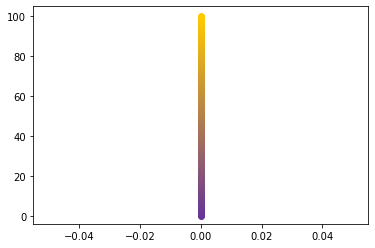

In [9]:
inter = Color.interpolate(["rebeccapurple", "rgb(255,202,0)"],space='srgb')
for x in range(100+1):
    col=inter(x/100)
    col=(col[0],col[1],col[2])
    pl.scatter([0],[x],color=col)


In [11]:
source=['MNIST','EMNIST','FashionMNIST','KMNIST','USPS']
target=['MNIST','EMNIST','FashionMNIST','KMNIST','USPS']


MNIST
150.3 98.7 104.7
152.1 100.5 102.9
233.8 181.1 21.2
233.8 181.1 21.2
153.6 101.9 101.4

EMNIST
149.5 97.8 105.5
150.3 98.7 104.7
227.6 174.9 27.4
237.0 184.3 18.0
165.4 113.6 89.6

FashionMNIST
232.9 180.2 22.1
216.7 164.2 38.3
150.3 98.7 104.7
255.0 202.0 0.0
105.8 54.8 149.2

KMNIST
230.2 177.6 24.8
240.3 187.5 14.7
249.4 196.5 5.6
150.3 98.7 104.7
173.0 121.1 82.0

USPS
150.3 98.7 104.7
165.7 113.8 89.3
102.0 51.0 153.0
173.9 122.0 81.1
150.3 98.7 104.7


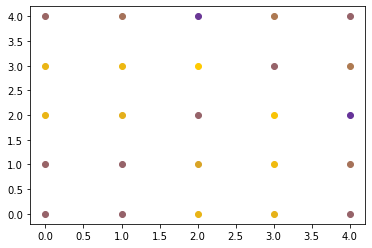

In [12]:
# Optim de la droite
table_W_mean=torch.tensor([[1030,1036,1313,1313,1041],
                           [1027,1030,1292,1324,1081],
                           [1310,1255,1030,1385,879],
                           [1301,1335,1366,1030,1107],
                           [1030,1082,866,1110,1030]])
table_W_std=torch.tensor([[2.7,4.3,5.5,4.8,2.3],
                         [3.8,5.3,6.3,6,8],
                         [4.6,7.3,5.6,6,6],
                         [3.3,4.9,2.4,4.1,3.2],
                         [6.7,6.6,3.4,7.4,3.5]])

maax=torch.max(table_W_mean)
miin=torch.min(table_W_mean)

table_W_mean=(table_W_mean-miin)/(maax-miin)
for i,row in enumerate(table_W_mean):
    print('')
    print(source[i])
    for j,x in enumerate(row):
        col=inter(x)
        print(np.round(255*col[0],1),np.round(255*col[1],1),np.round(255*col[2],1))
        pl.scatter([i],[j],color=col)